# Build basic 2-Layer MLP to solve the xor-Problem

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [83]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [84]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

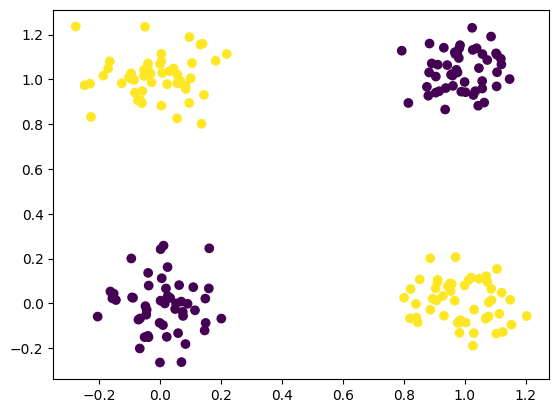

In [85]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [86]:
# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train = torch.tensor(X_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32)

y_test = torch.tensor(y_test, dtype=torch.float32)

y_train = y_train.reshape(-1,1)

y_test = y_test.reshape(-1,1)


In [87]:
# MLP class

import torch
class Perceptron(torch.nn.Module):
  def __init__(self, num_percep):
    super(Perceptron, self).__init__()
    self.fc1 = torch.nn.Linear(2, num_percep, bias=False)
    self.fc2 = torch.nn.Linear(num_percep, 1, bias=False)
    self.non_linear = torch.nn.Sigmoid()

  def forward(self, x):
    output = self.fc1(x)
    output = self.fc2(output)
    output = self.non_linear(output)
    return output

In [88]:
# Train

model = Perceptron(2)

criterion = torch.nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model.train()
epoch = 50


for epoch in range(epoch):
  optimizer.zero_grad()
  #froward
  y_pred = model(X_train)

  # compute loss
  loss = criterion(y_pred, y_train)
  print(f'epoch: {epoch}, loss: {loss.item()}')

  loss.backward()
  optimizer.step()



epoch: 0, loss: 0.7144785523414612
epoch: 1, loss: 0.7144175171852112
epoch: 2, loss: 0.714356541633606
epoch: 3, loss: 0.7142959833145142
epoch: 4, loss: 0.7142356038093567
epoch: 5, loss: 0.7141755223274231
epoch: 6, loss: 0.7141156792640686
epoch: 7, loss: 0.714056134223938
epoch: 8, loss: 0.7139967083930969
epoch: 9, loss: 0.713937520980835
epoch: 10, loss: 0.7138786911964417
epoch: 11, loss: 0.7138200402259827
epoch: 12, loss: 0.7137618064880371
epoch: 13, loss: 0.7137035131454468
epoch: 14, loss: 0.7136456966400146
epoch: 15, loss: 0.7135879397392273
epoch: 16, loss: 0.7135305404663086
epoch: 17, loss: 0.7134732604026794
epoch: 18, loss: 0.7134162783622742
epoch: 19, loss: 0.7133595943450928
epoch: 20, loss: 0.7133030295372009
epoch: 21, loss: 0.713246762752533
epoch: 22, loss: 0.7131907343864441
epoch: 23, loss: 0.7131349444389343
epoch: 24, loss: 0.7130793333053589
epoch: 25, loss: 0.7130239009857178
epoch: 26, loss: 0.7129687666893005
epoch: 27, loss: 0.7129137516021729
epoch:

In [89]:
# test

model.eval()
y_pred = model(X_train)
y_pred = (y_pred > 0.5).int().flatten()
train_acc = torch.sum(y_pred == y_train)/y_train.shape[0]
print(f'train accuracy: {train_acc.float()}')

train accuracy: 89.0


In [90]:
model.eval()
y_pred_test = model(X_test)
y_pred_test = (y_pred_test > 0.5).int().flatten()
test_acc = torch.sum(y_pred_test == y_test)/y_test.shape[0]
print(f'test accuracy: {test_acc.float()}')

test accuracy: 9.699999809265137
